# Gradient Descent

##### Contents

1.  [Quick Overview of Gradient Descent](#Overview) <br>
2.  [Application of Gradient Descent](#Application) <br>

More details on section _2.  Application of Gradient Descent_:
1. [Update Rules](#Update_Rules) <br>
2. [Code](#Code) <br>
    2.1. [Helper Functions](#Helper_Functions) <br>
    2.2. [Main Gradient Descent Function](#GD_Function) <br>
    2.3. [Running Gradient Descent](#Running_GD) <br>


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from IPython.display import Image

<br/>

### 1.  <a id = 'Overview'> Quick Overview of Gradient Descent </a>

Consider the problem
$$ \min_{x \in \mathbb{R}^d} \ f(x)
$$
where $f$ is some objective function, not necessarily convex. We note that the convexity condition often helps guaranteeing the convergence of the algorithms. We will assume that $f$ is sufficiently smooth, ie. $f$ is differentiable, at least once. Given $f$, we denote by $\nabla f$ the gradient of $f$.

Given a step size $\alpha_t$ (which can be kept constant or updated with *backtracking line search*), the __gradient descent__ algorithm is thus:

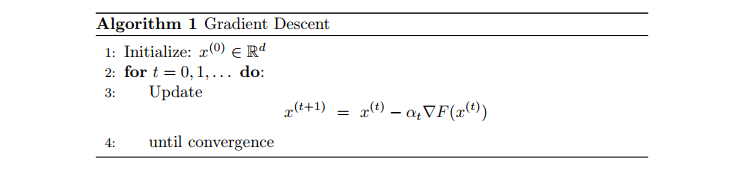

In [2]:
Image(filename = "Algorithm Summary/Gradient Descent.png", width=600, height=400)

More information on the **gradient descent** algorithm as well as its variants are summarized in the [Optimization - Algorithm Summary](https://github.com/thn003/optimization_num_analysis/blob/master/Optimization/Optimzation%20-%20Algorithm%20Summary.pdf).

***

<br/>

### 2.  <a id = 'Application'> Application of Gradient Descent </a>

In this project, we will

1.  Write a generic function to run *gradient descent* </br>
2.  Apply the function on these 4 objective functions: </br>
    (a) $f_1 = e^{x+y}$ </br>
    (b) $f_2 = \ln(1 + e^{x+y})$ </br>
    (c) $f_3 = x^2 + y^2$ </br>
    (d) $f_4 = x^2 + xy + y^2$
    
</br>

#### 2.1.  <a id = 'Update_Rules'> Update Rules </a>

Given the $4$ functions above, we first explicitly write out the update rules using their gradients:

$$
    \nabla f_1 = \left( e^{x+y} \right) \begin{bmatrix} 1 \\ 1 \end{bmatrix};   \quad \quad
    \nabla f_2 = \left( \frac{e^{x+y}}{1 + e^{x+y}} \right) \begin{bmatrix} 1 \\ 1 \end{bmatrix};   \quad \quad
    \nabla f_3 = \begin{bmatrix} 2x \\ 2y \end{bmatrix};    \quad \quad
    \nabla f_4 = \begin{bmatrix} 2x + y \\ 2y + x \end{bmatrix}    
$$

</br>


#### 2.2.  <a id = 'Code'> Code </a>

##### 2.2.1.  <a id = 'Helper_Functions'> Helper Functions </a>

We first define some helper functions to compute the functions and their gradients:

*  `f_1` $= f_1$, `f_2` $= f_2$, `f_3` $= f_3$, and `f_4` $= f_4$
*  `f_1_grad` $= \nabla f_1$, `f_2_grad` $= \nabla f_2$, `f_3_grad` $= \nabla f_3$, and `f_4_grad` $= \nabla f_4$
*  `plot` to plot the loss functions

In [3]:
# (a) f = exp(x+y)
def f_1(x): return(np.e**(x[0]+x[1]))
def f_1_grad(x): return(np.array([f_1(x), f_1(x)]))

# (b) f = ln(1 + exp(x+y))
def f_2(x): return(np.log(1 + np.e**(x[0]+x[1])))
def f_2_grad(x): return(np.array([f_1(x)/(1+f_1(x)), f_1(x)/(1+f_1(x))]))

# (c) f = x^2 + y^2
def f_3(x): return(x[0]**2 + x[1]**2)
def f_3_grad(x): return(np.array([2*x[0], 2*x[1]]))

# (d) f = x^2 + xy + y^2
def f_4(x): return(x[0]**2 + x[1]**2 + x[0]*x[1])
def f_4_grad(x): return(np.array([2*x[0] + x[1], 2*x[1] + x[0]]))

# Plot function
def plot(loss, plt_color, plt_label):
    plt.scatter(idx, loss, s = 10, color = plt_color, alpha=0.5)
    plt.plot(idx, loss, '-', color = plt_color, alpha=0.5, 
         label = plt_label)

<br/>

##### 2.2.2.  <a id = 'GD_Function'> Main Gradient Descent Function </a>

In [4]:
def grad_desc_alg(f, f_grad, x, M, alpha):
    
    loss_vector = np.zeros(M)     # Initialize loss vector
    
    for m in range(0,M):          # Train model

        loss_vector[m] = f(x)   # Current loss

        grad_eval = f_grad(x)   # Evalute gradient at current point
        x = x - alpha * grad_eval # Update x
        
    return(loss_vector)

<br/>

##### 2.2.3.  <a id = 'Running_GD'> Running Gradient Descent </a>

We are going to run the algorithm with different choices of the starting $x^{(0)}$. This is since the functions are (somewhat special, in that we can easily guess the optimal $x^*$), the different starting $x^{(0)}$ will give us some intuition about the convergence rate of the algorithm. In particular, we will fix the number of iterations $M = 1,000$, and the step size $\alpha_t = .01$.

We will initialize over $3$ different $x^{(0)}$:
$$
    x^{(0)} \in \left\{
    \begin{bmatrix} 0 \\ 0 \end{bmatrix},
    \begin{bmatrix} 1 \\ 1 \end{bmatrix},
    \begin{bmatrix} 100 \\ 300 \end{bmatrix}
    \right\}
$$

1.  Parameters:
$ x^{(0)} = \begin{bmatrix} 0 \\ 0 \end{bmatrix} $

In [5]:
alpha, M = .01, 1000
x = np.array([0,0])
loss_1_1 = grad_desc_alg(f_1, f_1_grad, x, M, alpha)
loss_2_1 = grad_desc_alg(f_2, f_2_grad, x, M, alpha)
loss_3_1 = grad_desc_alg(f_3, f_3_grad, x, M, alpha)
loss_4_1 = grad_desc_alg(f_4, f_4_grad, x, M, alpha)

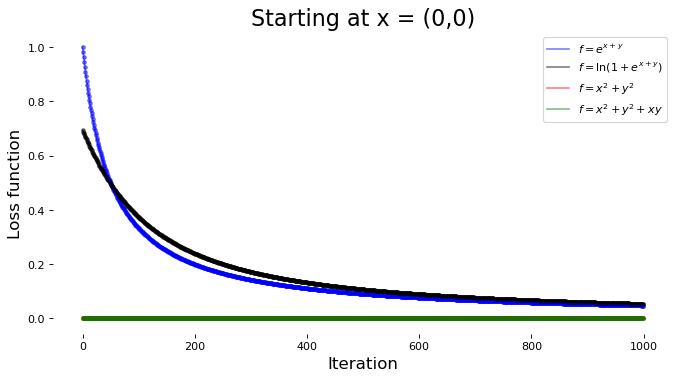

In [6]:
figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')
plt.box(False)

idx = np.arange(0, M)
# Plot of loss functions
plot(loss_1_1, 'blue', '$f = e^{x+y}$')
plot(loss_2_1, 'black', '$f = \ln(1 + e^{x+y})$')
plot(loss_3_1, 'red', '$f = x^2 + y^2$')
plot(loss_4_1, 'green', '$f = x^2 + y^2 + xy$')
# Plot Title
plt.title('Starting at x = (0,0)', fontsize = 20)
plt.xlabel('Iteration', fontsize = 15); plt.ylabel('Loss function', fontsize = 15)
plt.legend()
# Save plot
# plt.savefig('173B - HW1 - P3 - x=(0,0).png', bbox_inches='tight')

</br>

2.  Parameters:
$ x^{(0)} = \begin{bmatrix} 1 \\ 1 \end{bmatrix}
$

In [7]:
alpha, M = .01, 1000
x = np.array([1,1])
loss_1_2 = grad_desc_alg(f_1, f_1_grad, x, M, alpha)
loss_2_2 = grad_desc_alg(f_2, f_2_grad, x, M, alpha)
loss_3_2 = grad_desc_alg(f_3, f_3_grad, x, M, alpha)
loss_4_2 = grad_desc_alg(f_4, f_4_grad, x, M, alpha)

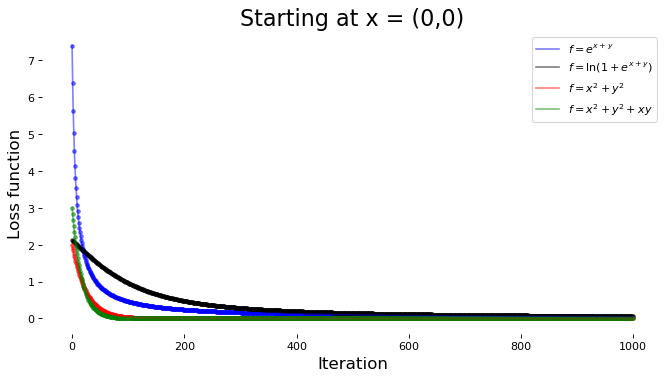

In [8]:
figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')
plt.box(False)

idx = np.arange(0, M)
# Plot of loss functions
plot(loss_1_2, 'blue', '$f = e^{x+y}$')
plot(loss_2_2, 'black', '$f = \ln(1 + e^{x+y})$')
plot(loss_3_2, 'red', '$f = x^2 + y^2$')
plot(loss_4_2, 'green', '$f = x^2 + y^2 + xy$')
# Plot Title
plt.title('Starting at x = (0,0)', fontsize = 20)
plt.xlabel('Iteration', fontsize = 15); plt.ylabel('Loss function', fontsize = 15)
plt.legend()
# Save plot
# plt.savefig('173B - HW1 - P3 - x=(1,1).png', bbox_inches='tight')

</br>

3.  Parameters:
$ x^{(0)} = \begin{bmatrix} 100 \\ 300 \end{bmatrix} $

In [9]:
alpha, M = .01, 1000

x = np.array([100,300])
loss_1_3 = grad_desc_alg(f_1, f_1_grad, x, M, alpha)
loss_2_3 = grad_desc_alg(f_2, f_2_grad, x, M, alpha)
loss_3_3 = grad_desc_alg(f_3, f_3_grad, x, M, alpha)
loss_4_3 = grad_desc_alg(f_4, f_4_grad, x, M, alpha)

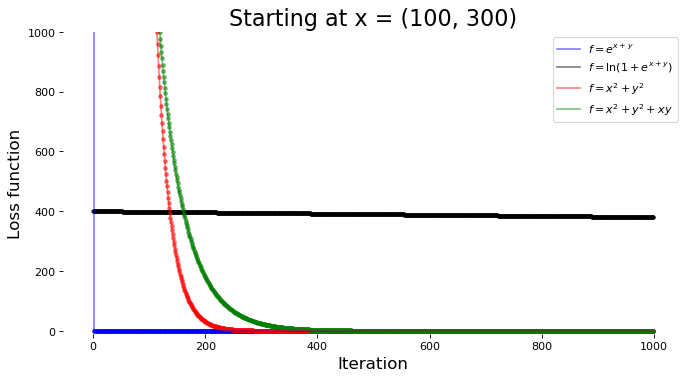

In [10]:
figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')
plt.box(False)

idx = np.arange(0, M)
plt.ylim(-10, 1000)
# Plot of loss functions
plot(loss_1_3, 'blue', '$f = e^{x+y}$')
plot(loss_2_3, 'black', '$f = \ln(1 + e^{x+y})$')
plot(loss_3_3, 'red', '$f = x^2 + y^2$')
plot(loss_4_3, 'green', '$f = x^2 + y^2 + xy$')
# Plot Title
plt.title('Starting at x = (100, 300)', fontsize = 20)
plt.xlabel('Iteration', fontsize = 15); plt.ylabel('Loss function', fontsize = 15)
plt.legend()
# Save plot
# plt.savefig('173B - HW1 - P3 - x=(100,300).png', bbox_inches='tight')